**라이브러리 Import 하기**

In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


**X and Y data**

In [2]:
x_train = [1, 2, 3, 4, 5]
#y_train = [2, 4, 6, 8, 10]
y_train = [3, 5, 7, 9, 11] #y = 2x +1

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

#x_train = [1, 2, 3]

#y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가

# 다음의 것들도 해보시오
#y_train = [2, 4, 6] # 그냥 x_train 에 2배 곱해서 생성
#y_train = [3, 5, 7]

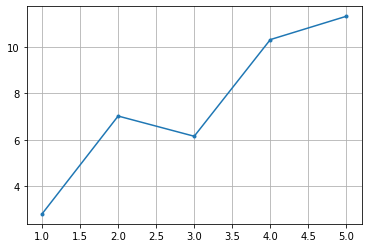

In [3]:
plt.plot(x_train, y_train,'.-')
plt.grid()

**Initialization**

In [4]:
useRandom = False

In [5]:
if useRandom:
    W = tf.Variable(tf.random_normal([1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')
else:
    w0 = 7.0;
    b0 = 5.0;

    W = tf.Variable(w0*tf.ones([1]), name='weight')
    b = tf.Variable(b0*tf.ones([1]), name='bias')

**Our hypothesis**
$$ H(x)=Wx + b $$

In [6]:
hypothesis = x_train * W + b

**cost/loss function 정의하기**
* loss of one training example :$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [7]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

**Optimizer**

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

**Launch the graph in a session**

In [9]:
sess = tf.Session()

**Initializes global variables in the graph.**

In [10]:
sess.run(tf.global_variables_initializer())

In [11]:
nb_epoch = 1001
vloss = [] #empty list
vb = [] #empty list
vw = [] #empty list
for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    
    if step % 50 == 0: # 5번마다
        w1 = sess.run(W)[0] # 기울기
        b1 = sess.run(b)[0] # bias
        
        print(step,'\t', loss1, '\t', w1, '\t',b1)

0 	 228.92712 	 5.693153 	 4.6305733
50 	 1.6037261 	 1.5588337 	 3.1433043
100 	 1.4486576 	 1.6331297 	 2.8750498
150 	 1.3381368 	 1.6958574 	 2.648583
200 	 1.2593671 	 1.7488137 	 2.457394
250 	 1.2032262 	 1.7935208 	 2.295987
300 	 1.1632138 	 1.8312637 	 2.1597235
350 	 1.1346958 	 1.8631275 	 2.044685
400 	 1.1143707 	 1.8900276 	 1.9475669
450 	 1.0998847 	 1.9127374 	 1.8655773
500 	 1.0895602 	 1.9319096 	 1.7963594
550 	 1.0822017 	 1.9480953 	 1.737924
600 	 1.0769572 	 1.9617596 	 1.6885916
650 	 1.0732195 	 1.9732953 	 1.6469438
700 	 1.0705554 	 1.9830343 	 1.6117829
750 	 1.0686566 	 1.9912561 	 1.5820996
800 	 1.0673031 	 1.9981973 	 1.5570397
850 	 1.066339 	 2.0040572 	 1.5358839
900 	 1.0656513 	 2.0090044 	 1.5180234
950 	 1.0651615 	 2.0131803 	 1.5029458
1000 	 1.0648124 	 2.0167065 	 1.4902166


Text(0, 0.5, 'loss')

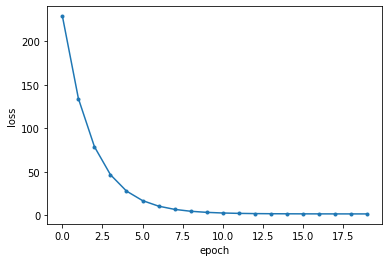

In [12]:
plt.plot(vloss[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

**학습완료**

In [13]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

출력해보기

In [14]:
print(w1, b1)

2.0167065 1.4902166


In [15]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

y = 2.0167065x + 1.4902166


In [16]:
print(w1, b1)

str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

2.0167065 1.4902166
y = 2.0167065x + 1.4902166


Text(0.5, 1.0, 'y = 2.0167065x + 1.4902166')

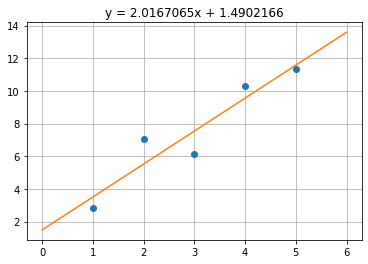

In [17]:
plt.figure(figsize=(6,4)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)

**<h3>스스로 해보기**

노이즈 다르게하기

In [18]:
x_train = [1, 2, 3]
y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가

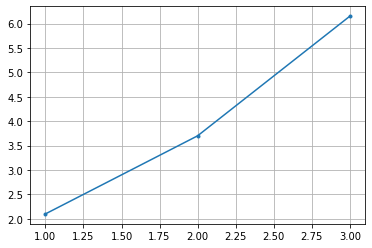

In [19]:
plt.plot(x_train, y_train,'.-')
plt.grid()

In [20]:
x_train = [1, 2, 3, 4, 5]
y_train = [2+2, 4+2, 6+2, 8+2, 10+2]#y=2x+2

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise


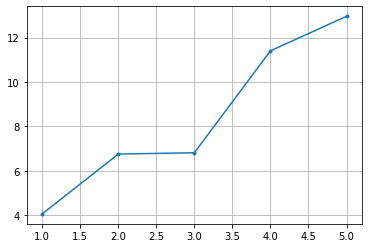

In [21]:
plt.plot(x_train, y_train,'.-')
plt.grid()

In [22]:
w0 = 15.0;
b0 = 9.0;

W = tf.Variable(w0*tf.ones([1]), name='weight')
b = tf.Variable(b0*tf.ones([1]), name='bias')

In [23]:
hypothesis = x_train * W + b
loss = tf.reduce_mean(tf.square(hypothesis - y_train))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [24]:
nb_epoch = 201
vloss =[]
vb = []
vw = []
for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    w1 = sess.run(W)[0] # 기울기
    vw.append(w1)
    b1 = sess.run(b)[0] # bias
    vb.append(b1)
    if step % 10 == 0: # 200번마다
        
        print(step,'\t' ,loss1,'\t' ,w1,'\t', b1)

0 	 1403.0945 	 11.753674 	 8.087973
10 	 9.122426 	 2.0067365 	 5.2621217
20 	 2.6890578 	 1.3808559 	 4.966856
30 	 2.5318456 	 1.3670007 	 4.845172
40 	 2.411373 	 1.3933386 	 4.738544
50 	 2.2989097 	 1.4214694 	 4.636207
60 	 2.1938138 	 1.4488432 	 4.537328
70 	 2.0955997 	 1.4753172 	 4.4417443
80 	 2.0038161 	 1.5009106 	 4.349343
90 	 1.9180454 	 1.5256519 	 4.2600193
100 	 1.8378912 	 1.5495694 	 4.17367
110 	 1.762986 	 1.5726904 	 4.0901957
120 	 1.6929868 	 1.5950414 	 4.0095015
130 	 1.6275721 	 1.6166481 	 3.9314945
140 	 1.5664414 	 1.6375353 	 3.856085
150 	 1.5093143 	 1.6577269 	 3.783187
160 	 1.4559282 	 1.6772461 	 3.7127163
170 	 1.4060389 	 1.6961154 	 3.6445923
180 	 1.3594164 	 1.7143563 	 3.5787365
190 	 1.3158472 	 1.73199 	 3.5150738
200 	 1.2751317 	 1.7490362 	 3.4535315


Text(0, 0.5, 'loss')

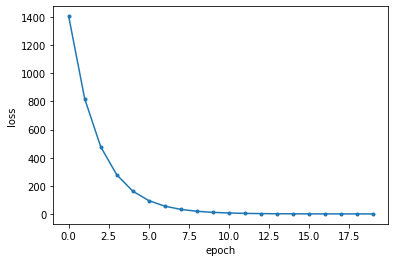

In [25]:
plt.plot(vloss[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

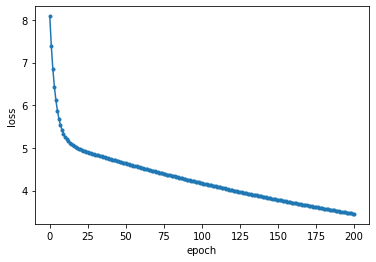

In [26]:
plt.plot(vb,'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

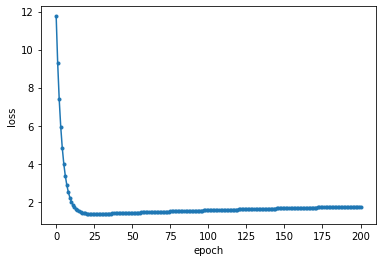

In [27]:
plt.plot(vw,'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

In [28]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

print(w1, b1)
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

1.7490362 3.4535315
y = 1.7490362x + 3.4535315


Text(0.5, 1.0, 'y = 1.7490362x + 3.4535315')

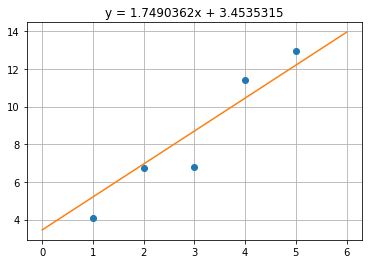

In [29]:
plt.figure(figsize=(6,4)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)

In [36]:
import sklearn

ModuleNotFoundError: No module named 'sklearn'

##R-Squared

모델이 데이터에 얼마나 적합한 지 수치 적으로 결정하는 방법.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import random
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

##MSE (Mean Squared Error)


In [32]:
x = [[1], [2], [3], [4], [5]]
#y_train = [2, 4, 6, 8, 10]
y = [[1], [5],[6], [7], [11]] 
y=np.array(y)
x=np.array(x)
mean=(1+5+6+7+11)/5
print(y)

[[ 1]
 [ 5]
 [ 6]
 [ 7]
 [11]]


Text(0, 0.5, 'Y')

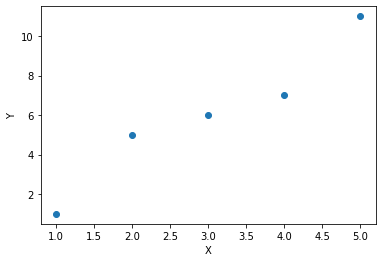

In [33]:
plt.plot(x,y,marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

In [34]:
lr=LinearRegression()
lr.fit(x,y)

NameError: name 'LinearRegression' is not defined

NameError: name 'lr' is not defined

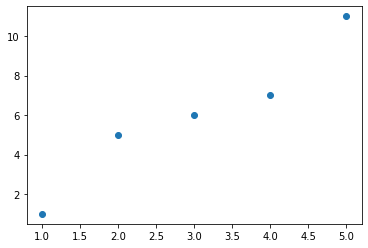

In [35]:
plt.plot(x,y,marker='o',linestyle='')
plt.plot(x,lr.predict(x),color = 'red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color='black')

In [ ]:
mean_squared_error(y,lr.predict(x))

In [ ]:
print(lr.predict(x))

In [ ]:
def myMSE(X,Y, line):
  err=0

  if(str(type(line)) == "<class 'float'>"):#평균 MSE 구하기
    for i in range(len(X)):
      err += (Y[i][0]-line)**2
  else:
    for i in range(len(X)): #예측값 MSE 구하기
      err += (Y[i][0]-line[i][0])**2

  MSE = err / len(X)
  return MSE

In [ ]:
print ("MSE : ", myMSE(x,y,lr.predict(x)))

##R squared

In [ ]:
lr.score(x,y)

In [ ]:
def myRsq(X,Y,model):
  #평균구하기
  hap = 0
  for i in range(len(X)):
    hap+=Y[i][0]
  mean = float(hap/len(X))
  print("평균 : ",mean)

  #모델 fit하기
  model.fit(X,Y)

  #MSE와 R-squared 구하기
  reg_mse= myMSE(X,Y,model.predict(X))
  avg_mse = myMSE(X,Y,mean)
  r=1-(reg_mse/avg_mse)

  #출력
  print("R-squared : ", r)

In [ ]:
myRsq(x,y,LinearRegression())

##100개 데이터로 해보기
##데이터가 선형모델에 적합한 경우

1.데이터 만들기


In [ ]:
data = 100 #데이터 개수 정하기

In [ ]:
#x_train 데이터 만들기
x_train=[]
for i in range(1,data+1):
  x_train.append([i])

x_train=np.array(x_train)
x_train.shape

In [ ]:
#y_train 데이터 만들기
y_train1=[]
for i in range(1,data+1): #y_train에 노이즈를 만들어서 넣기
  y_train1.append([i+random.uniform(-20,20)]) #난수발생시켜서 노이즈 만들기

y_train1=np.array(y_train1)
y_train1.shape

In [ ]:
plt.plot(x_train, y_train1, marker='o', linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

##2.모델에 넣기

In [ ]:
lr.fit(x_train,y_train1)

In [ ]:
#평균값 구하기
mean=0

for i in y_train1:
  for j in i:
    mean+=j
mean = mean/data
print(mean)

In [ ]:
#예측한 값과 평균 그려보기
plt.plot(x_train, y_train1, marker='o', linestyle='')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_train,lr.predict(x_train),color = 'red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color='black')

함수와 내가 만든 함수 비교하기

In [ ]:
lr.score(x_train,y_train1)


In [ ]:
myRsq(x_train,y_train1, LinearRegression())

##데이터가 선형모델에 부적합한 경우

In [ ]:
#y_train 데이터 만들기
y_train2=[]
for i in range(1,data+1): #y_train에 노이즈를 만들어서 넣기
  y_train2.append([i+random.uniform(-400,400)]) #난수발생시켜서 노이즈 만들기

y_train2=np.array(y_train2)
y_train2.shape

In [ ]:
plt.plot(x_train, y_train2, marker='o', linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
#평균값 구하기
mean=0

for i in y_train2:
  for j in i:
    mean+=j
mean = mean/data
print(mean)

In [ ]:
lr.fit(x_train,y_train2)

In [ ]:
#예측한 값과 평균 그려보기
plt.plot(x_train, y_train2, marker='o', linestyle='')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_train,lr.predict(x_train),color = 'red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color='black')

In [ ]:
lr.score(x_train,y_train2)

In [ ]:
myRsq(x_train,y_train2, LinearRegression())